In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
m_data = pd.read_csv("moderateData.csv")
b_data = pd.read_csv("bigData.csv")
s_data = pd.read_csv("smallData.csv")
l_data = pd.read_csv("logNormalData.csv")
m_data.shape

(399, 2)

In [3]:
b_data.shape

(9999, 2)

In [4]:
s_data.shape

(29, 2)

In [5]:
l_data.shape

(199, 2)

In [6]:
def sortDATA(df):
    df.columns = ['class', 'score']
    df_sorted = df.sort_values(by = ['score'], ascending=False)
    return df_sorted.reset_index(drop=True)

In [7]:
def generateROC(df, Options):
    n_samples = len(df)
    n_H1 = len(df[df['class'] == 1])
    n_H0 = len(df[df['class'] == 0])
    fpr = []
    tpr = []
    n_D = 0
    n_FA = 0
    thresholds = []
    if Options == "sklearn":
        fpr, tpr, thresholds = roc_curve(df['class'], df['score'])
    elif Options == "ONE":
        for i in range(n_samples):
            thresholds.append(df['score'][i])
            if df['class'][i] == 0:
                n_FA += 1
            else:
                n_D += 1
            fpr.append(n_FA/n_H0)
            tpr.append(n_D/n_H1)
    elif Options == "TWO":
        threshold_min = df['score'][n_samples-1]
        threshold_max = df['score'][0]
        batch = (threshold_max - threshold_min)/99
        for i in range(100):
            thresholds.append(threshold_max - i * batch)
            n_FA = len(df[(df['class'] == 0) & (df['score'] >= thresholds[-1])])
            n_D = len(df[(df['class'] == 1) & (df['score'] >= thresholds[-1])])
            fpr.append(n_FA/n_H0)
            tpr.append(n_D/n_H1)
    elif Options == "THREE":
        n_size = n_samples // 99
        if n_size == 0:
            n_size = 1
        for i in range(0, n_samples, n_size):
            thresholds.append(df['score'][i])
            for j in range(i, i + n_size):
                if j < n_samples:
                    if df['class'][j] == 0:
                        n_FA += 1
                    else:
                        n_D += 1
            fpr.append(n_FA/n_H0)
            tpr.append(n_D/n_H1)
    elif Options == "FOUR":
        for i in range(n_samples):
            if df['class'][i] == 0:
                thresholds.append(df['score'][i])
                n_FA = len(df[(df['class'] == 0) & (df['score'] >= thresholds[-1])])
                n_D = len(df[(df['class'] == 1) & (df['score'] >= thresholds[-1])])
                fpr.append(n_FA/n_H0)
                tpr.append(n_D/n_H1)
    elif Options == "FIVE":
        data_index = 0
        for i in range(0, 101):
            while(n_FA/n_H0 < i * 0.01):
                if df['class'][data_index] == 0:
                    n_FA += 1
                else:
                    n_D += 1
                data_index += 1
            if data_index < n_samples:
                thresholds.append(df['score'][data_index])
            else:
                thresholds.append(df['score'][data_index - 1])
            fpr.append(n_FA/n_H0)
            tpr.append(n_D/n_H1)
    else:
        print("Please enter a valid option!")
    
    return fpr, tpr, thresholds

In [8]:
def generateCURVE(df):
    fpr1, tpr1, thresholds1 = generateROC(df, "ONE")
    fpr2, tpr2, thresholds2 = generateROC(df, "TWO")
    fpr3, tpr3, thresholds3 = generateROC(df, "THREE")
    fpr4, tpr4, thresholds4 = generateROC(df, "FOUR")
    fpr5, tpr5, thresholds5 = generateROC(df, "FIVE")
    plt.figure(dpi=1200)
    plt.plot(fpr1, tpr1, label='ROC curve1', linestyle='-')
    plt.plot(fpr2, tpr2, label='ROC curve2', linestyle='--')
    plt.plot(fpr3, tpr3, label='ROC curve3', linestyle='-.')
    plt.plot(fpr4, tpr4, label='ROC curve4', linestyle=':')
    plt.plot(fpr5, tpr5, label='ROC curve5', linestyle=(0, (1, 1)))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('$P_{FA}$')
    plt.ylabel('$P_D$')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [9]:
def plot(df):
    data = sortDATA(df)
    generateCURVE(data)

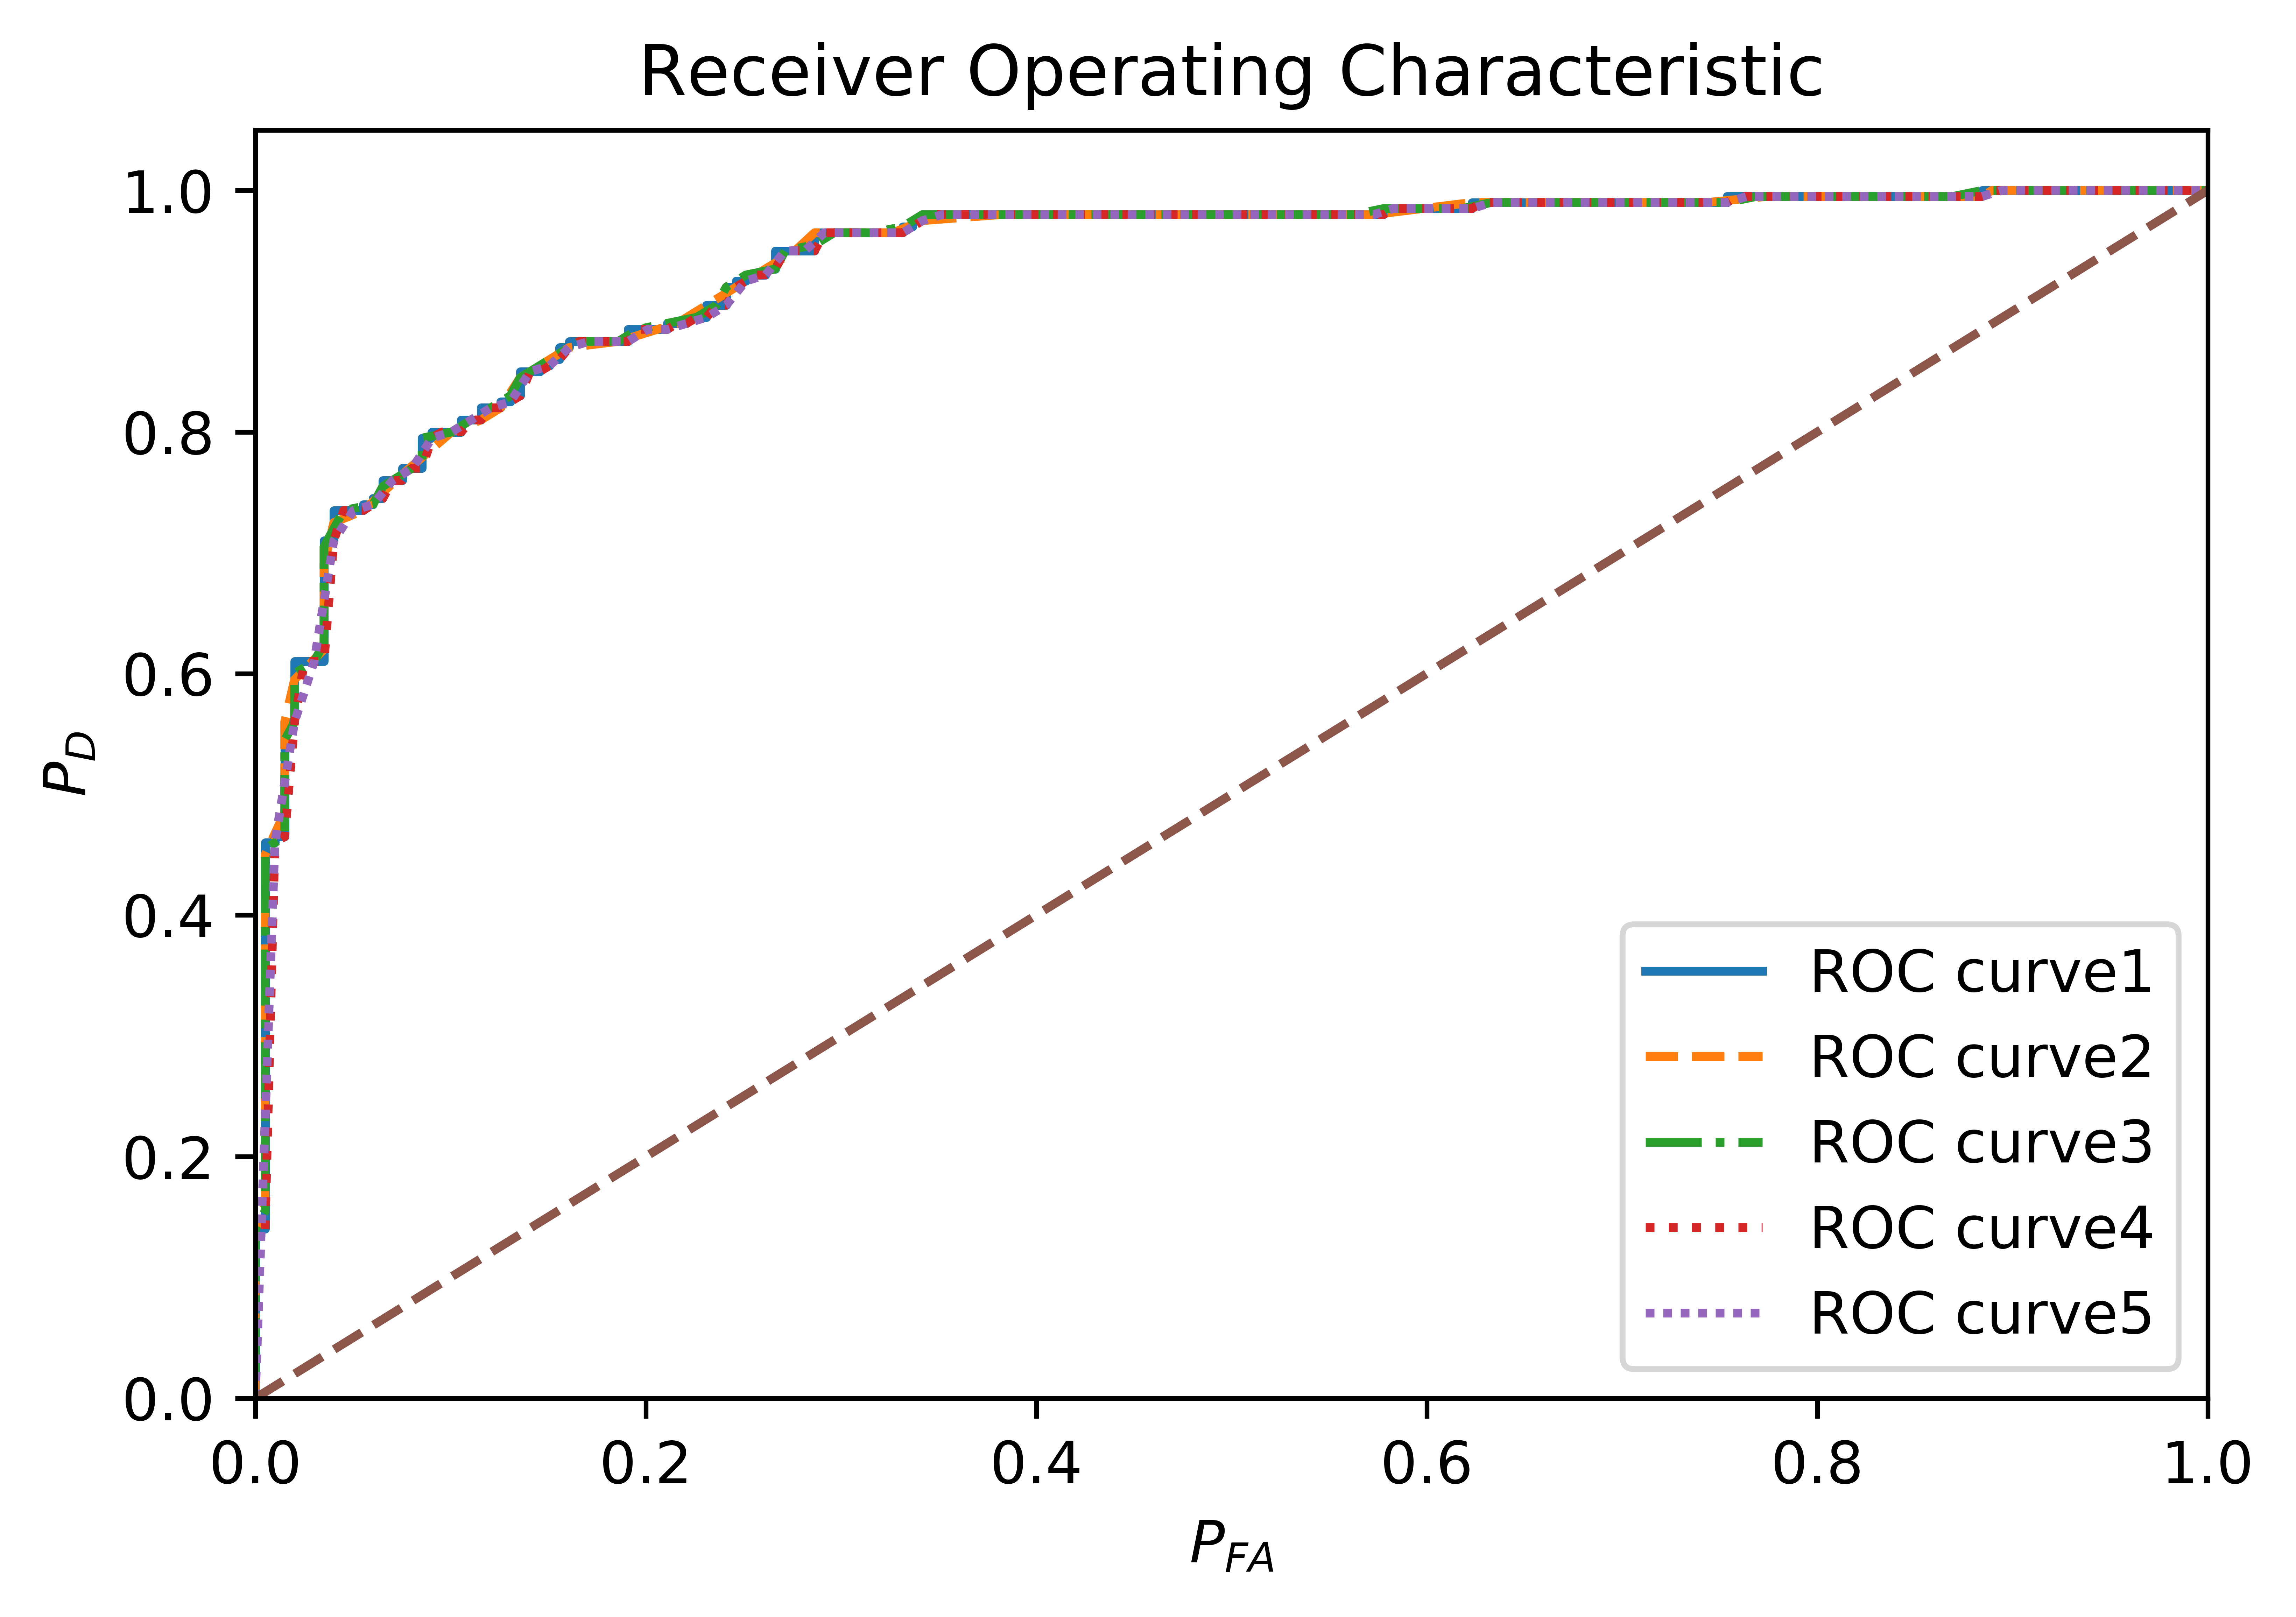

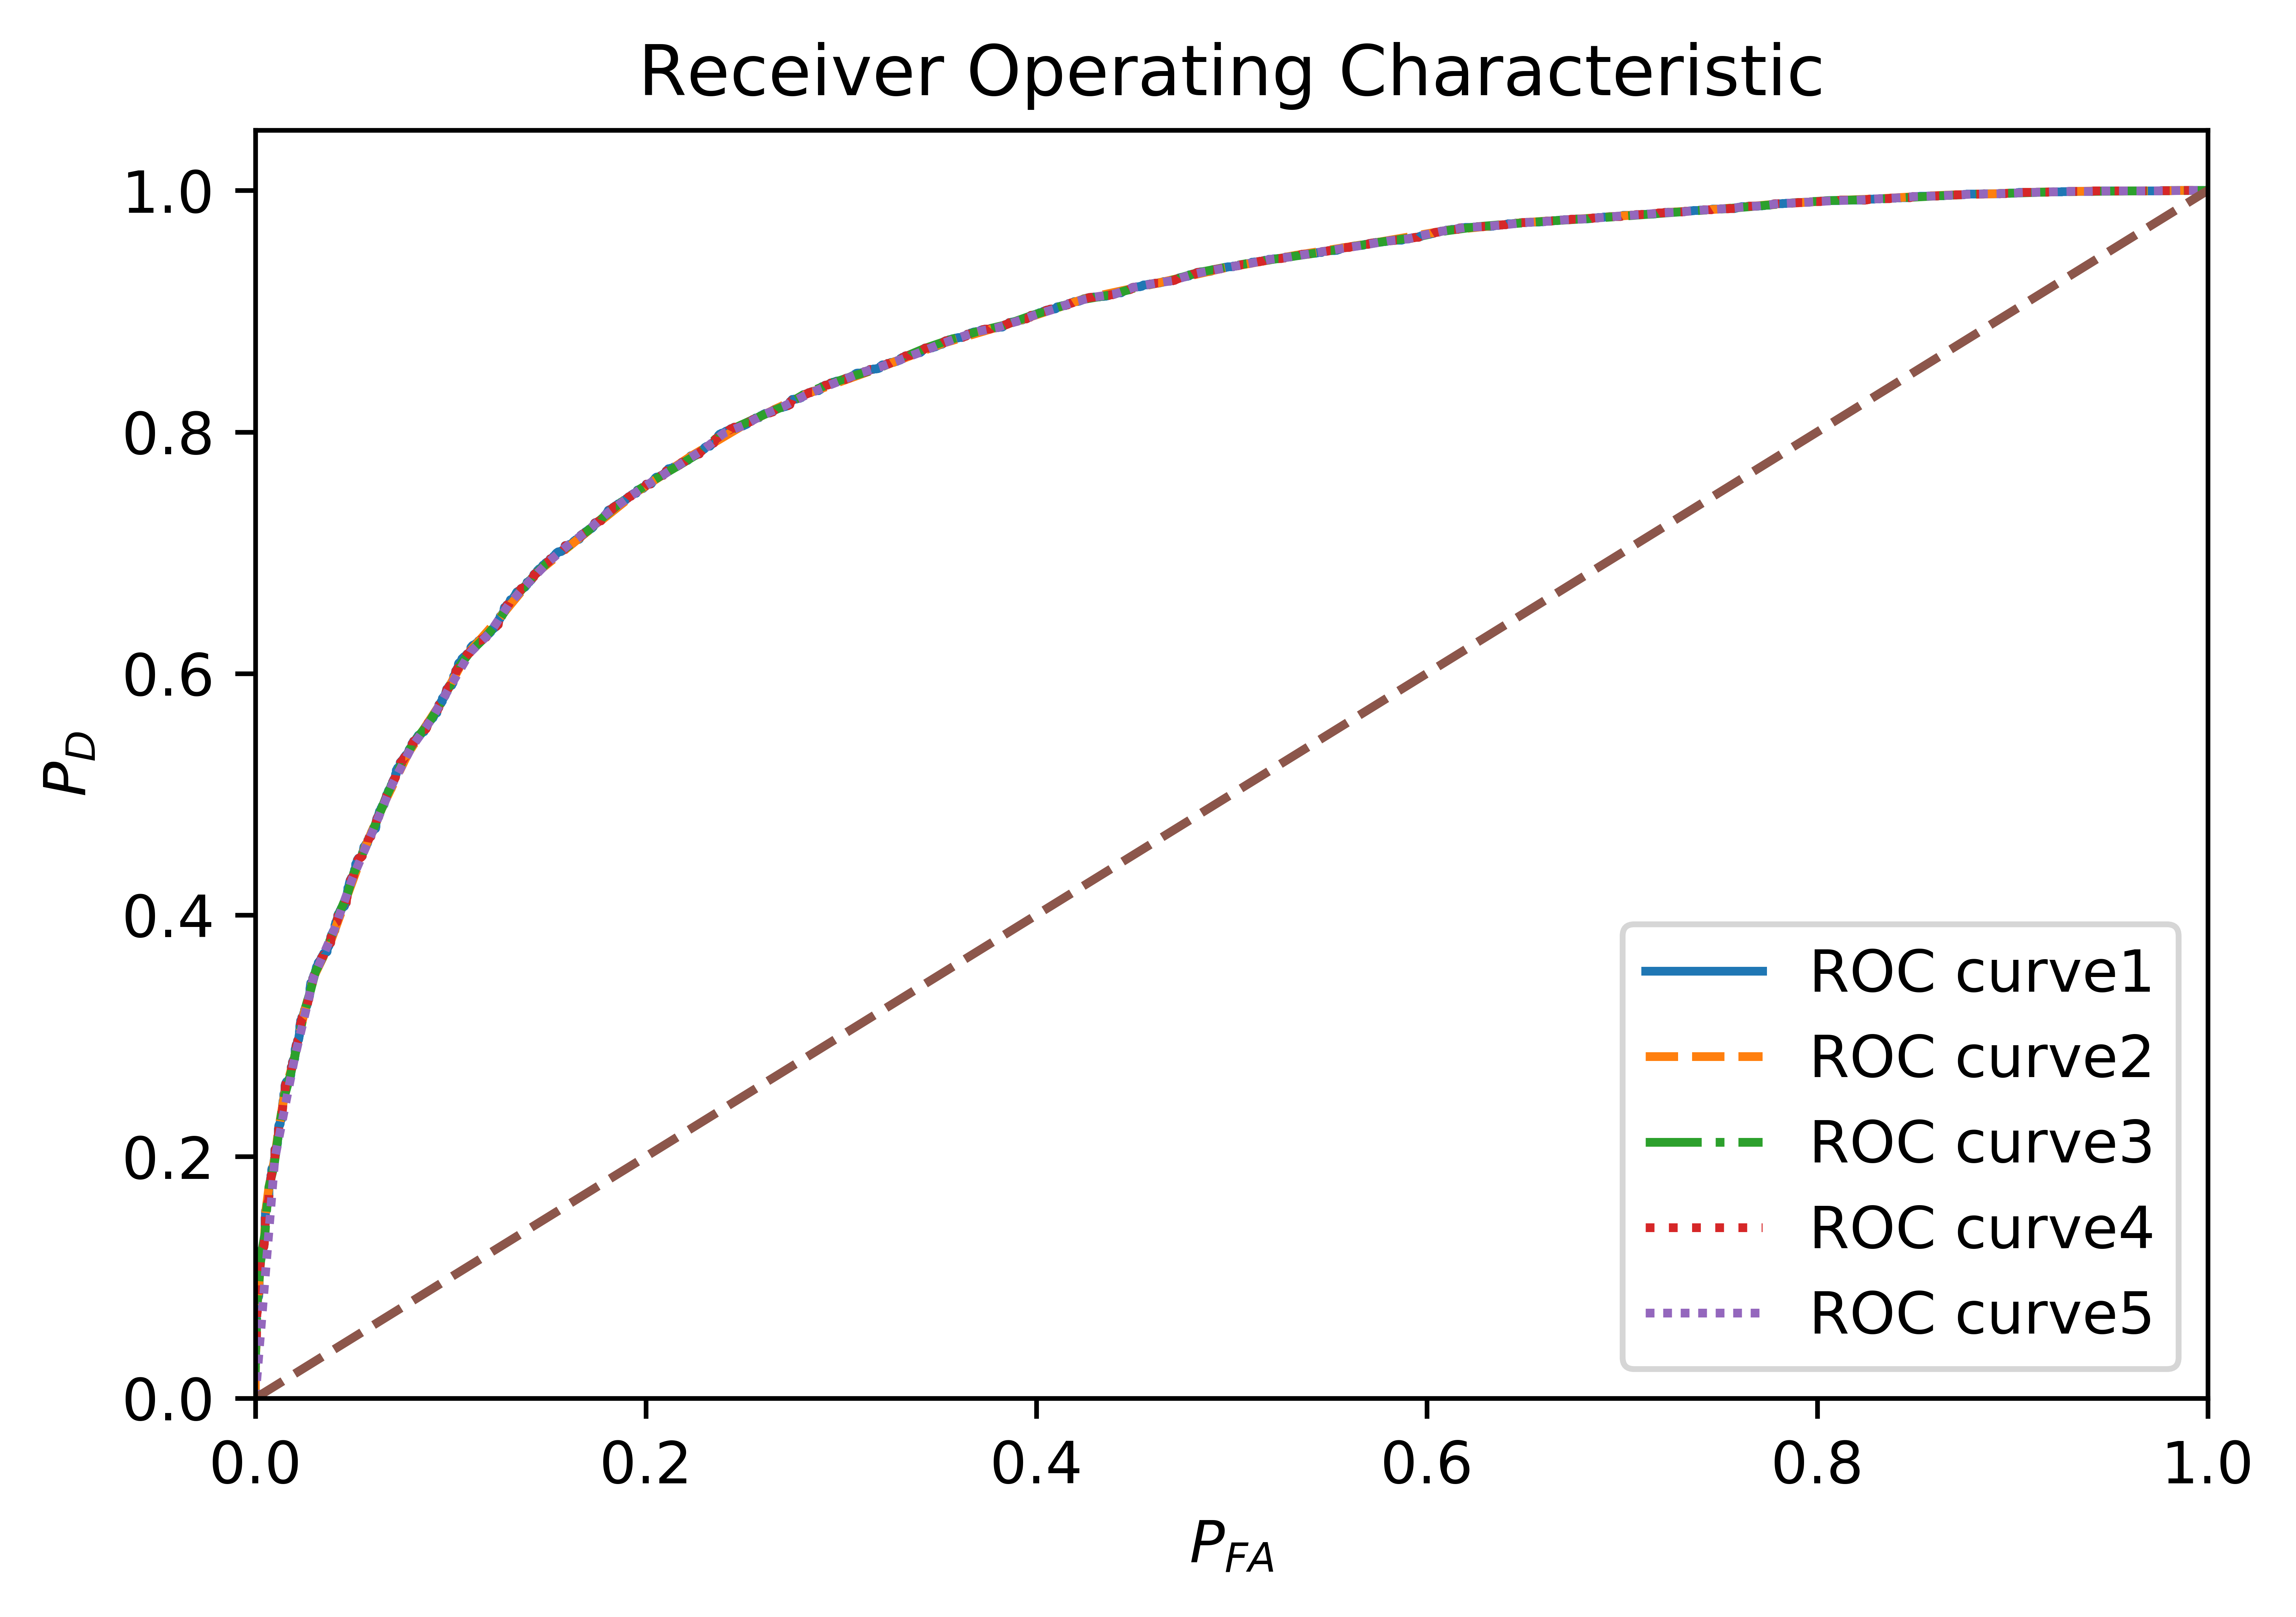

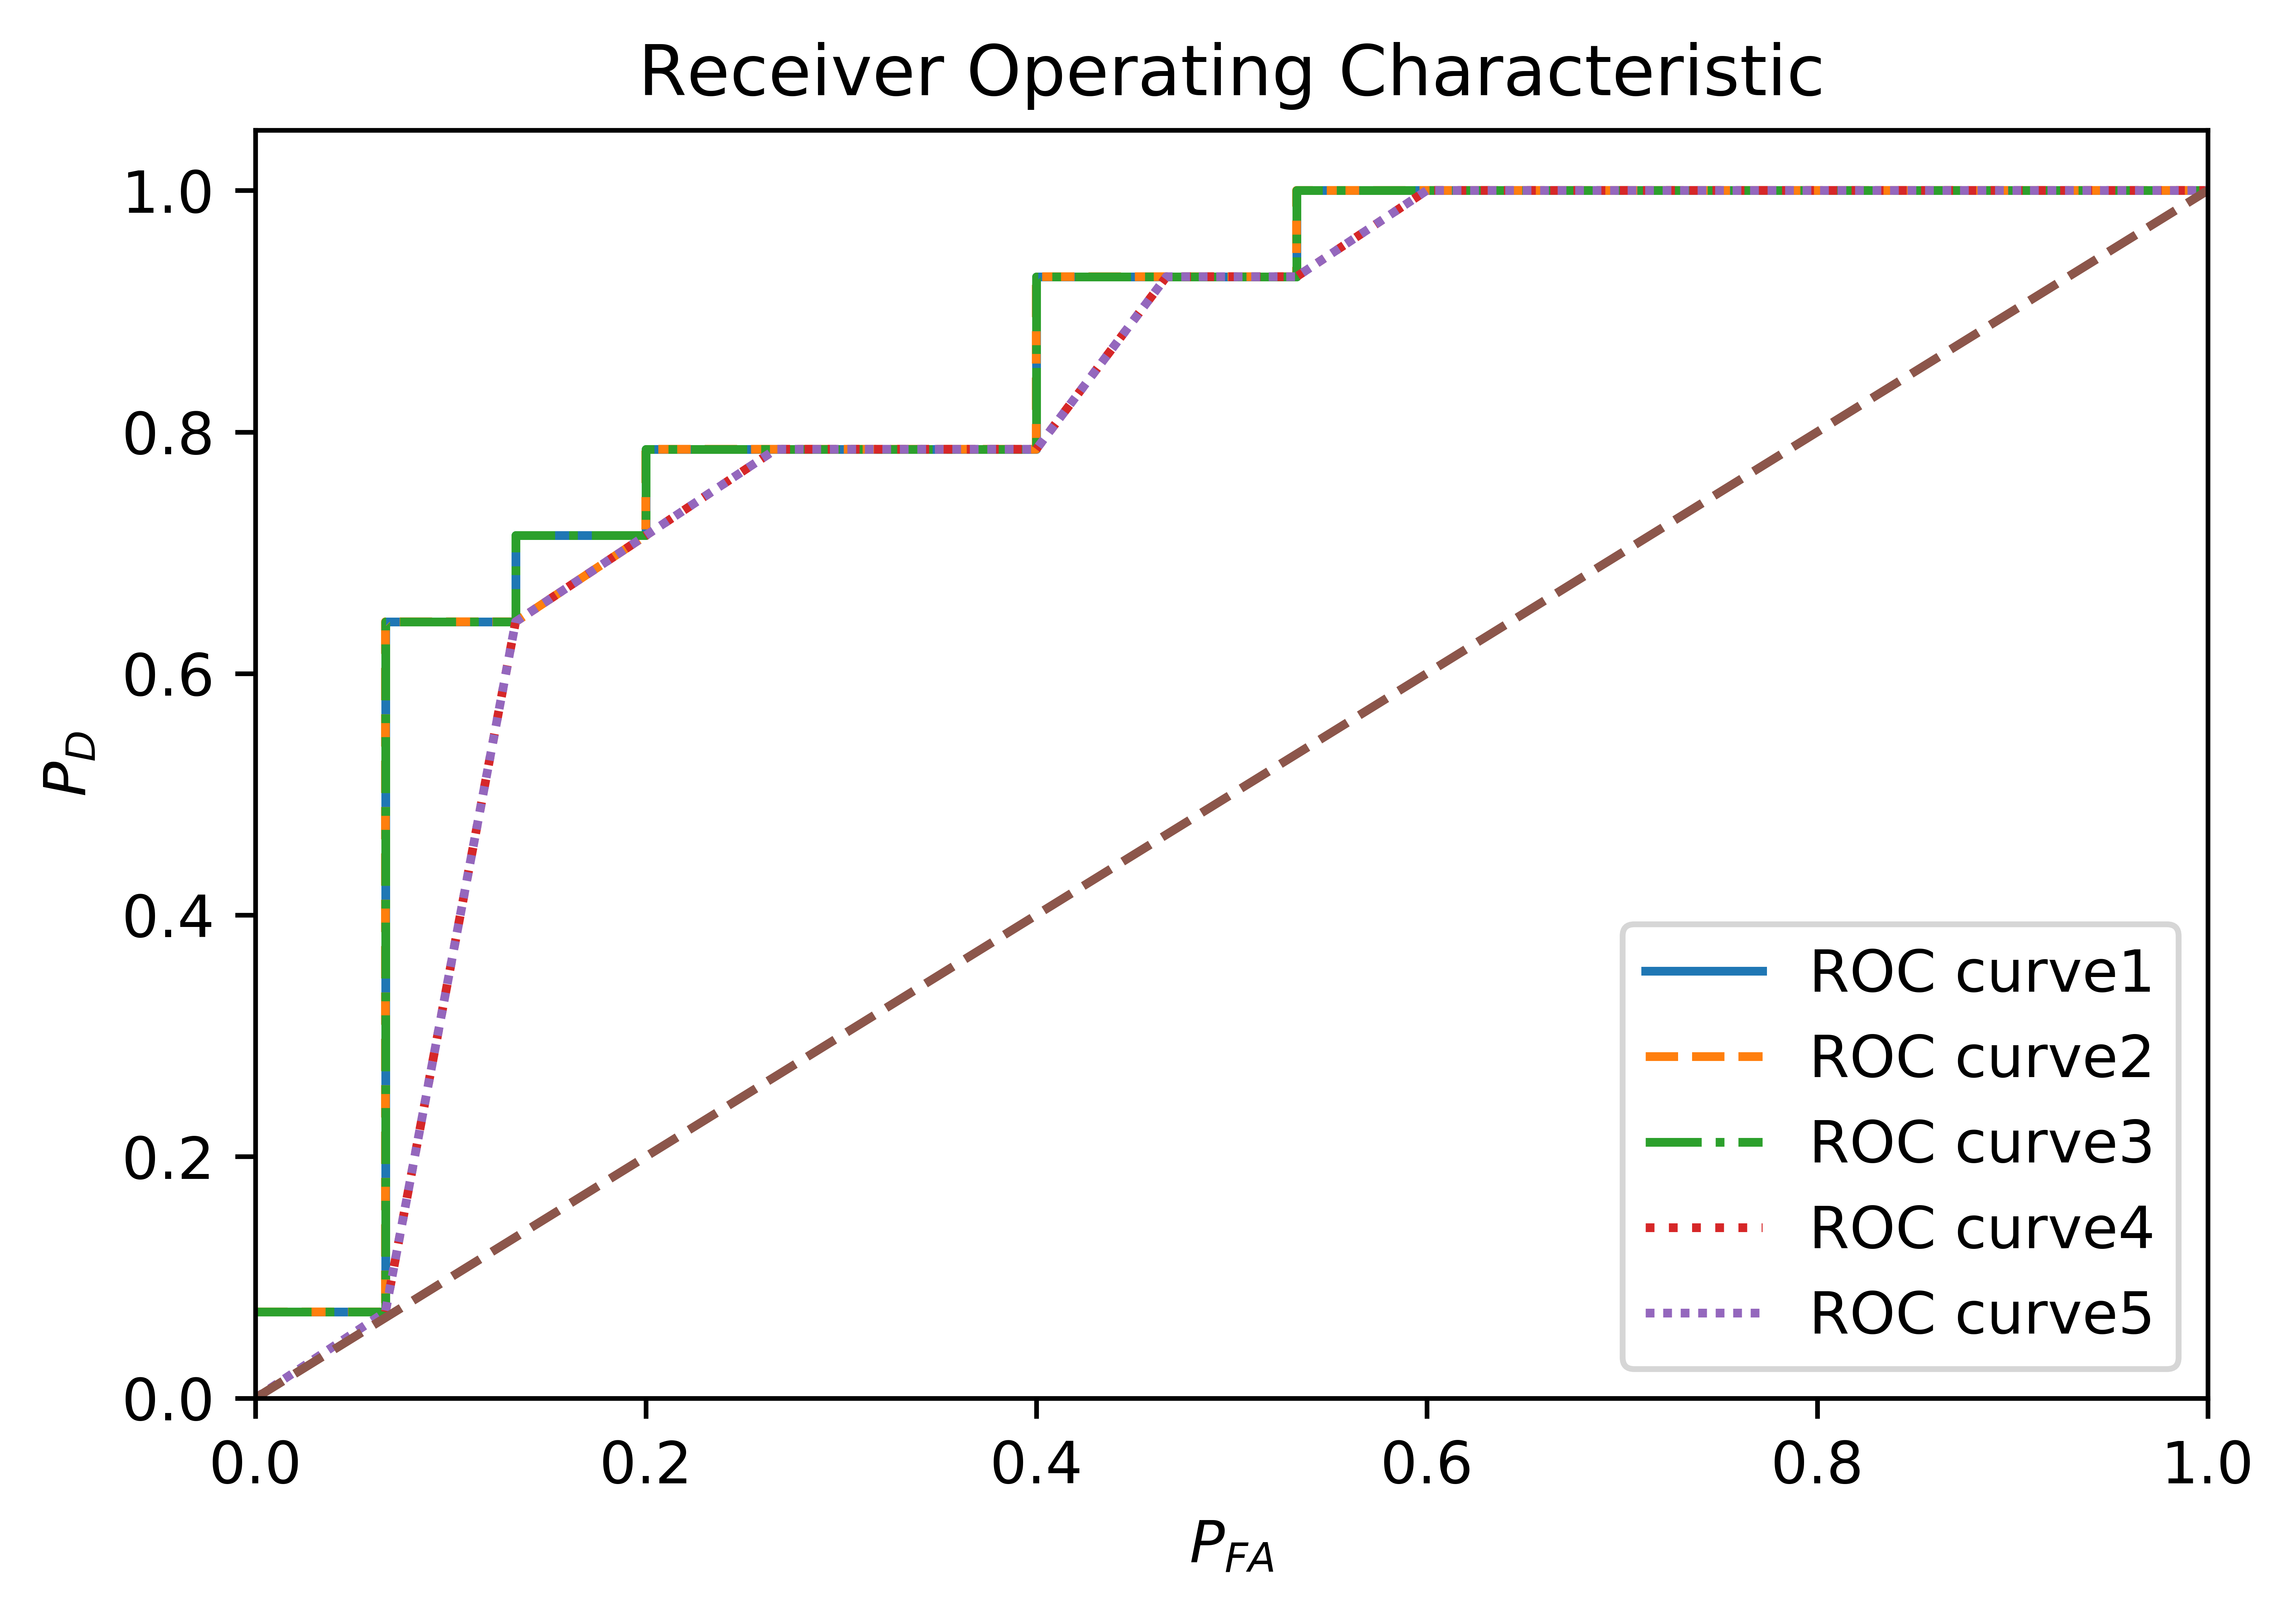

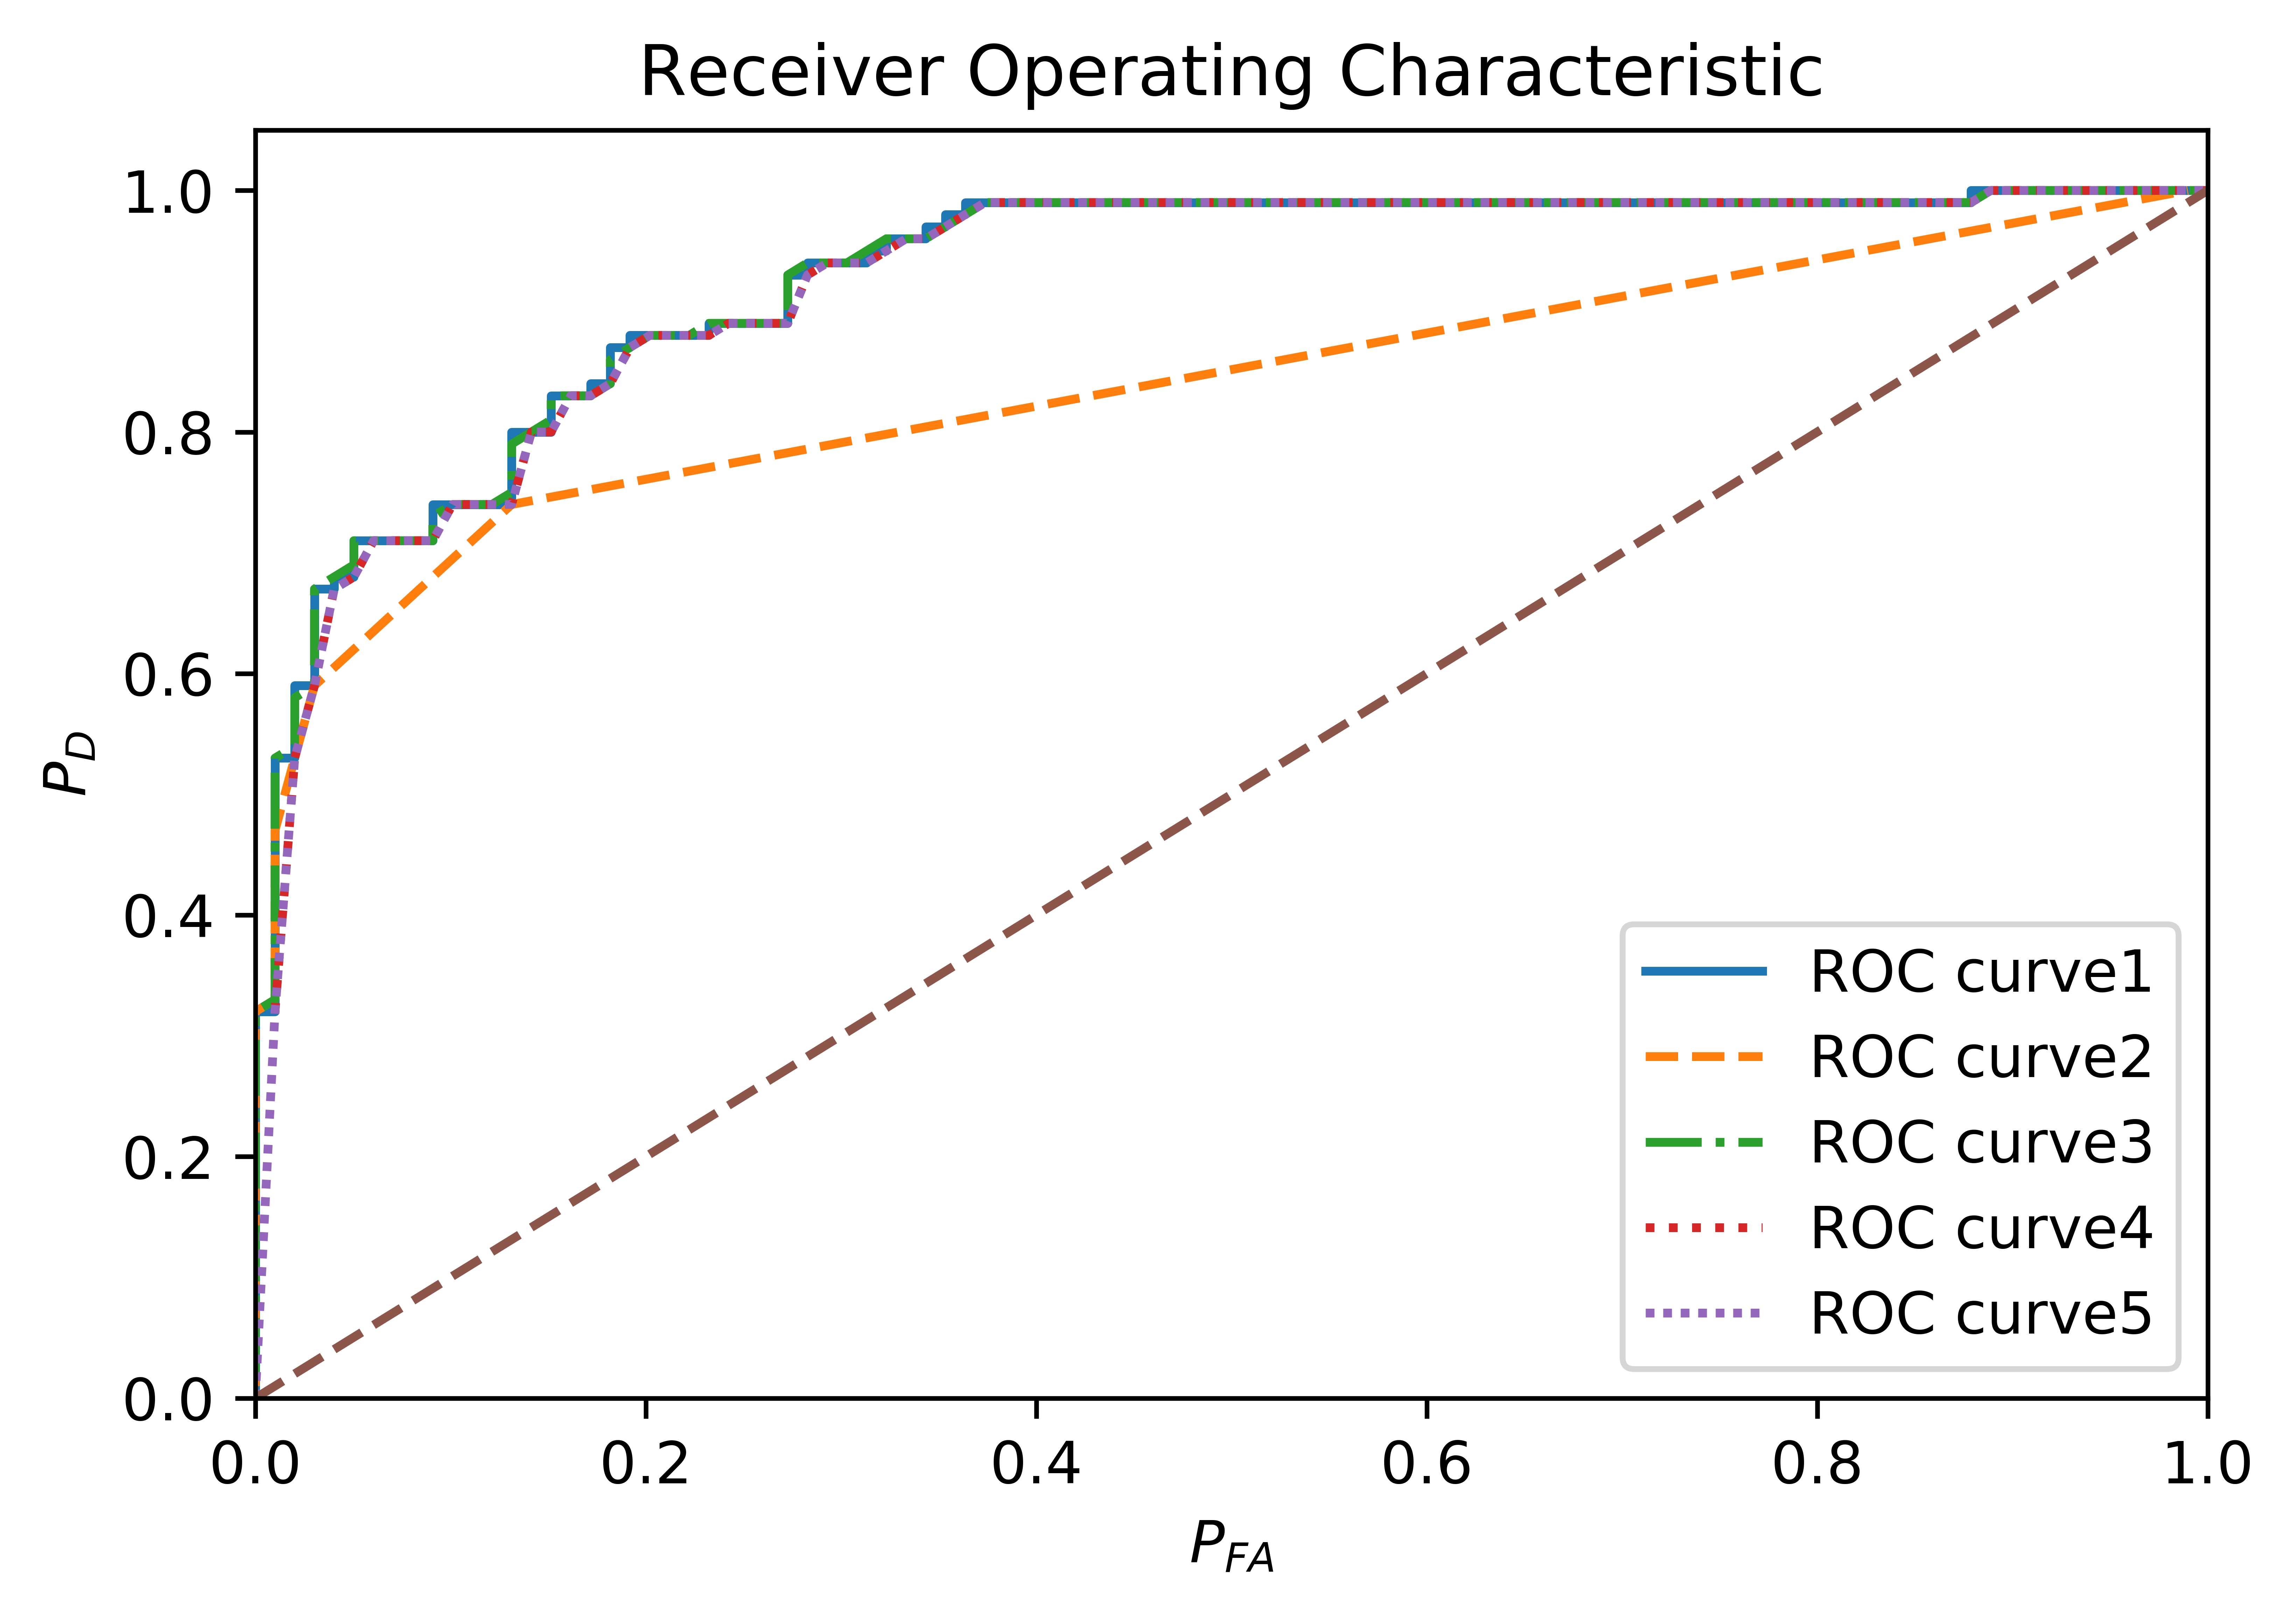

In [10]:
plot(m_data)
plot(b_data)
plot(s_data)
plot(l_data)

In [11]:
m_data[m_data['class']==0].shape

(199, 2)

In [12]:
l_data[l_data['class']==0].shape

(99, 2)